# Drive matrix elements
I noticed something interesting--the matrix elements of the resonator charge operator in the dressed eigenbasis change drastically at a certain cutoff.

The Fluxonium initialization procedure involves driving the $|h0\rangle \to |e1\rangle$ transition. This requires that $\langle h0 | \hat \varphi_r| e1 \rangle$ is relatively large. Even though this only involves the $|g\rangle, |e\rangle, |f\rangle,|g\rangle$ levels of the Fluxonium, this matrix element is very small unless at least the first seven energy levels of the Fluxonium are kept.

## Set up Fluxonium with cutoff at 7
I exaggerated the coupling strength so that the matrix elements would be more visible

In [1]:
import scqubits as scq
import qutip as qt

#experimental values borrowed from 
# https://journals.aps.org/prx/pdf/10.1103/PhysRevX.11.011010
fluxonium = scq.Fluxonium(
    EJ = 3.395,
    EC = .479,
    EL = .132,
    flux = .5,
    cutoff = 110,
    truncated_dim = 7
)

osc = scq.Oscillator(
    E_osc=5.7,
    truncated_dim=5,
    id_str = 'resonator'
)

hilbertspace = scq.HilbertSpace([fluxonium, osc])

hilbertspace.add_interaction(
    g_strength = 2, #exaggerated for contrast
    op1 = fluxonium.n_operator,
    op2 = osc.creation_operator,
    add_hc = True
)

hilbertspace.generate_lookup()

In [2]:
def basis_change(operator, subsystem, hilbertspace, dressed_eigenbasis = True):
    bare_evecs, = hilbertspace.bare_eigenstates(subsystem)
    op_id_wrap = scq.identity_wrap(operator, subsystem, hilbertspace.subsys_list, evecs = bare_evecs)
    evecs, = hilbertspace["evecs"]
    return op_id_wrap.transform(evecs)

(<Figure size 640x480 with 2 Axes>, <AxesSubplot:>)

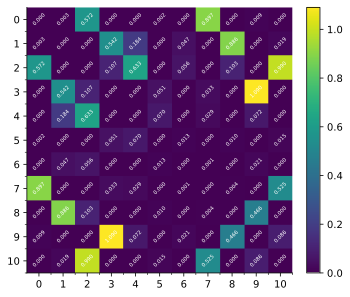

In [4]:
phi_r = basis_change(osc.annihilation_operator() + osc.creation_operator(), osc, hilbertspace);
scq.utils.plotting.matrix2d(phi_r.full()[:11,:11])

In [7]:
s0, = hilbertspace.dressed_index((3,0))
s1, = hilbertspace.dressed_index((1,1))
phi_r.full()[s0][s1] #matrix element needed for |h0> -> |e1> transition

(0.10249689086976493-0.004346474938858079j)

## Repeat procedure with lower dimensions
I was expecting that since only the first four energy levels of the fluxonium are involved in the procedure, not much would change by truncating to five or six. But this ends up having a profound affect on the matrix elements, changing the dynamics significantly. Repeating the procedure above but only keeping the first six dimensions yeilds a matrix element for the $|h0\rangle \to |e1\rangle$ transition that is 10x smaller.

In [30]:
fluxonium.truncated_dim = 6
fluxonium = scq.Fluxonium(
    EJ = 3.395,
    EC = .479,
    EL = .132,
    flux = .5,
    cutoff = 110,
    truncated_dim = 5
)

osc = scq.Oscillator(
    E_osc=5.7,
    truncated_dim=5,
    id_str = 'resonator'
)

hilbertspace = scq.HilbertSpace([fluxonium, osc])

hilbertspace.add_interaction(
    g_strength = 2, #exaggerated for contrast
    op1 = fluxonium.n_operator,
    op2 = osc.creation_operator,
    add_hc = True
)

hilbertspace.generate_lookup()

(<Figure size 640x480 with 2 Axes>, <AxesSubplot:>)

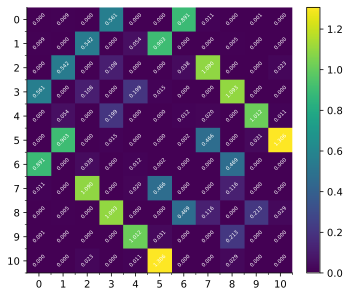

In [40]:
phi_r = basis_change(osc.annihilation_operator() + osc.creation_operator(), osc, hilbertspace);
scq.utils.plotting.matrix2d(phi_r.full()[:11,:11])

In [48]:
s0, = hilbertspace.dressed_index((3,0))
s1, = hilbertspace.dressed_index((1,1))
phi_r.full()[s0][s1] #look at how much smaller it is!!

(0.014712509606904064+0.0005712212980015664j)